In [2]:
from numpy.random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from os import path, listdir
from utils import neg_scenario_from_util_matrices, count_acceptable_offers
import pandas as pd
from uuid import uuid4
from shutil import rmtree

In [3]:
n_scenarios = 2
shape = (3, 3)
lower = 0
upper = 100
constr = -1000

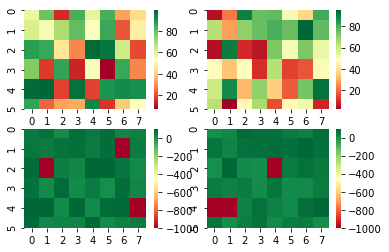

In [142]:
u_a = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
u_b = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
u_a_constr, u_b_constr = insert_constr(u_a,u_b,3)

fig, axes = plt.subplots(nrows=2,ncols=2)
sns.heatmap(u_a, ax=axes[0,0], cmap="RdYlGn")
sns.heatmap(u_b, ax=axes[0,1], cmap="RdYlGn")
sns.heatmap(u_a_constr, ax=axes[1,0], cmap="RdYlGn")
sns.heatmap(u_b_constr, ax=axes[1,1], cmap="RdYlGn")
plt.show()

In [202]:
def setup_random_scenarios(root_dir,shape,numb_of_scenarios):
    if path.exists(root_dir):
        rmtree(root_dir)
    os.mkdir(root_dir)
    
    lower = 0
    upper = 100
    
    base_a = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
    base_b = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
    
    for _ in range(numb_of_scenarios):
        uuid = uuid4()
        
        scenario_dir = path.join(root_dir,str(uuid)) 
        os.mkdir(scenario_dir)
        
        for cntr in range(2*shape[0]):
            instance_dir = path.join(scenario_dir,str(cntr))
            os.mkdir(instance_dir)
            constr_a, constr_b = insert_difficult_constraints(base_a,base_b,cntr)
            np.save(path.join(instance_dir,"a.npy"),constr_a)
            np.save(path.join(instance_dir,"b.npy"),constr_b)
            
        

In [203]:
def insert_difficult_constraints(a,b,numb):
    assert a.shape == b.shape
    a_ret = a.copy()
    b_ret = b.copy()
    constr = -max(a.max(),b.max()) * 2 * shape[0] # constr is minus twice the max times N
    
    
    for ind in zip(*np.unravel_index(np.argsort(b,axis=None)[::-1][:numb],b.shape)):
        i,j = ind
        a_ret[i,j] = constr
    
    for ind in zip(*np.unravel_index(np.argsort(a,axis=None)[::-1][:numb],a.shape)):
        i,j = ind
        b_ret[i,j] = constr

    return a_ret,b_ret


In [211]:
setup_random_scenarios("./scenarios",shape,n_scenarios)

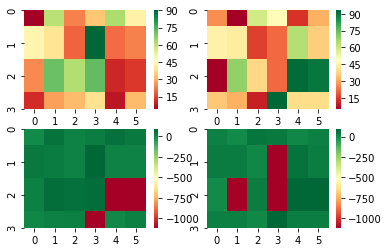

In [210]:
scenario_dir = next(iter(listdir("./scenarios")))
a_base = np.load("./scenarios/{dir}/0/a.npy".format(dir=scenario_dir))
b_base = np.load("./scenarios/{dir}/0/b.npy".format(dir=scenario_dir))
a_constr = np.load("./scenarios/{dir}/3/a.npy".format(dir=scenario_dir))
b_constr = np.load("./scenarios/{dir}/3/b.npy".format(dir=scenario_dir))

fig, axes = plt.subplots(nrows=2,ncols=2)
sns.heatmap(a_base, ax=axes[0,0], cmap="RdYlGn")
sns.heatmap(b_base, ax=axes[0,1], cmap="RdYlGn")
sns.heatmap(a_constr, ax=axes[1,0], cmap="RdYlGn")
sns.heatmap(b_constr, ax=axes[1,1], cmap="RdYlGn")
plt.show()

In [11]:
results = pd.read_csv("../results/rand_results.csv")
results

,id,constr_count,rho_a,rho_b,a_accepts,b_accepts,both_accept,p_a,p_b,p_ap_b,success,total_message_count,n_constraints,n_constraints_discovered,n_constraints_opponent_discovered,strat,utility,opponent_utility,opponent_strat
0,/home/sam/Documents/code/work/pyneg/src/scenar...,6,0.0,0.0,768,720,72,0.093750,0.100000,0.009375,True,2,6,0,0,Enumeration,85.8,-799.8,Enumeration
1,/home/sam/Documents/code/work/pyneg/src/scenar...,8,0.0,1.0,432,1,0,0.000000,0.000000,0.000000,False,4,8,1,1,Constrained Enumeration,-16777216.0,-16777216.0,Constrained Enumeration
2,/home/sam/Documents/code/work/pyneg/src/scenar...,13,0.0,1.0,48,1,0,0.000000,0.000000,0.000000,True,3,13,0,0,Enumeration,-596.8,62.8,Enumeration
3,/home/sam/Documents/code/work/pyneg/src/scenar...,3,1.0,0.0,1,1600,0,0.000000,0.000000,0.000000,False,4,3,1,0,Constrained Enumeration,-16777216.0,-16777216.0,Constrained Enumeration
4,/home/sam/Documents/code/work/pyneg/src/scenar...,12,0.0,1.0,64,1,0,0.000000,0.000000,0.000000,True,3,12,0,0,Random,-592.0,65.8,Random
5,/home/sam/Documents/code/work/pyneg/src/scenar...,9,1.0,1.0,1,1,0,0.000000,0.000000,0.000000,False,4,9,0,0,Enumeration,-16777216.0,-16777216.0,Enumeration
6,/home/sam/Documents/code/work/pyneg/src/scenar...,0,0.0,1.0,3125,1,1,0.000320,1.000000,0.000320,True,3,0,0,0,Enumeration,41.6,87.6,Enumeration
7,/home/sam/Documents/code/work/pyneg/src/scenar...,8,1.0,1.0,1,1,0,0.000000,0.000000,0.000000,False,2,8,0,0,Random,-16777216.0,-16777216.0,Random
8,/home/sam/Documents/code/work/pyneg/src/scenar...,1,1.0,0.0,1,2500,0,0.000000,0.000000,0.000000,False,4,1,1,0,Constrained Enumeration,-16777216.0,-16777216.0,Constrained Enumeration
9,/home/sam/Documents/code/work/pyneg/src/scenar...,10,1.0,0.0,1,216,0,0.000000,0.000000,0.000000,False,2,10,0,0,Random,-16777216.0,-16777216.0,Random


In [13]:
df_true = results[(results['constr_count'] == 0) & (results["strat"] == "Random") & (results["success"] == True)]
df_false = results[(results['constr_count'] == 0) & (results["strat"] == "Random") & (results["success"] == False)]

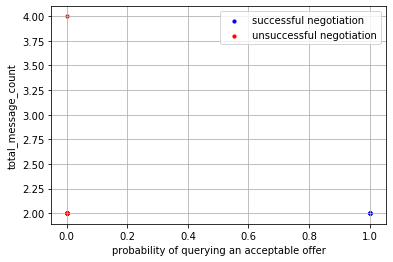

In [14]:
s = 10
plt.grid()
plt.scatter(x=df_true["p_ap_b"], y=df_true["total_message_count"],   c='b', label='successful negotiation', s=s)
plt.scatter(x=df_false["p_ap_b"], y=df_false["total_message_count"], c='r', label='unsuccessful negotiation', s=s)
plt.legend()
# plt.yscale("log")
plt.xlabel("probability of querying an acceptable offer")
plt.ylabel("total_message_count")
plt.show()

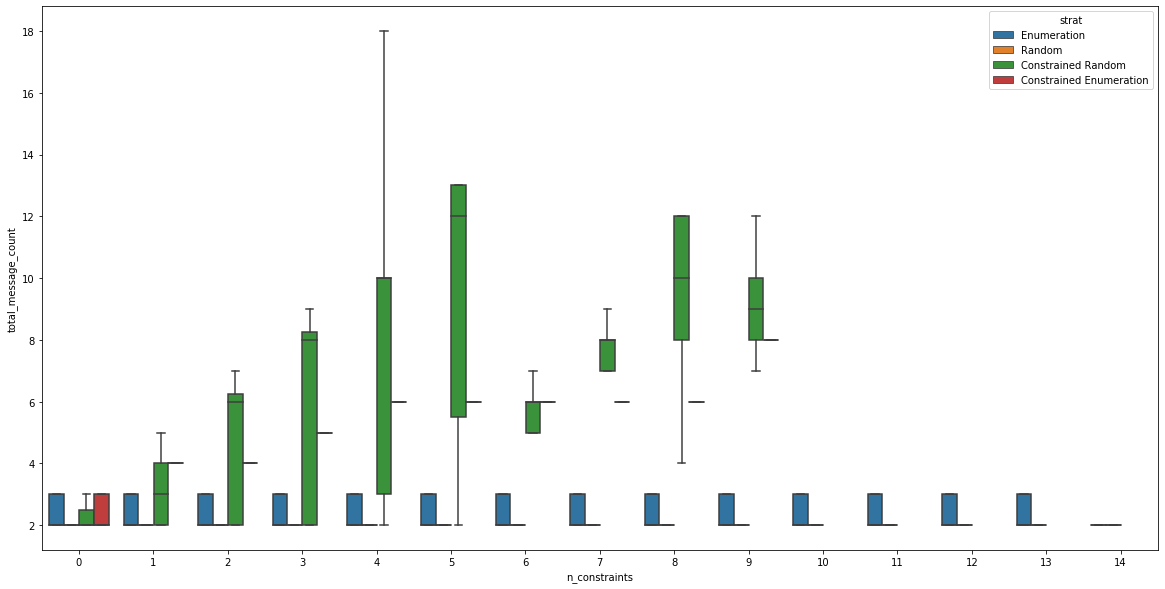

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x="n_constraints", y="total_message_count", hue="strat", data=results[results['success']],showfliers=False)


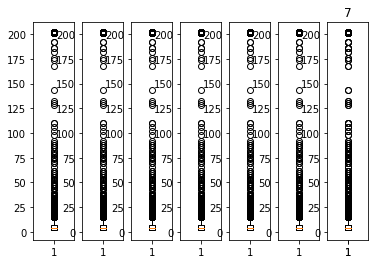

In [232]:
# n_constr = results["n_constraints"].max()
# fig, axes = plt.subplots(nrows=1,ncols=n_constr)
# for name, group in results.groupby("n_constraints"):
#     axes[int(name)-1].boxplot(results["total_message_count"])
#     plt.title(name)
# plt.show()